# Web scraping to find best deals at the best time
- Uses Selenium to scrape popular deals website

To do:
- Fix time column

In [76]:
from selenium import webdriver  
from selenium.webdriver.chrome.options import Options  
from selenium.webdriver.common.keys import Keys
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [2]:
# Set headless browser
options = Options()
options.headless = True

In [63]:
def clean_date(date_entry):
    temp = date_entry.split()
    if temp[-1]=='ago':
        # return dt.datetime.today().strftime("%d/%m/%Y")
        return pd.to_datetime('today')
    elif temp[0]=='Made':
        return parse(' '.join(temp[-2:]))
    else:
        return np.nan

def clean_company(company_entry):
    # reverse split to split by last space symbol
    try:
        return company_entry.rsplit(' ', 1)[0]
    except:
        return np.nan


def clean_price(price_entry):
    try:
        temp = price_entry[1:]
        temp = temp.replace(',', '')
        return round(float(temp))
    except:
        return np.nan


def clean_heat(heat_entry):
    temp = heat_entry[:-1]
    try:
        return int(temp)
    except:
        return np.nan

In [102]:
df = pd.DataFrame(columns=['Item', 'Price', 'Company', 'Heat', 'Date'])

for page_no in range(1,51):
    driver = webdriver.Chrome('chromedriver.exe', chrome_options=options)
    driver.get('https://www.hotukdeals.com/tag/electronics?page='+str(page_no))
    item_data = driver.find_elements_by_class_name('threadGrid-title')  # get title, price, company
    forum_data = results = driver.find_elements_by_class_name('threadGrid-headerMeta')  # get heat, date

    df_item = pd.DataFrame(columns=['Item', 'Price', 'Company'])
    for i in range(len(item_data)):
        temp = item_data[i].text.split('\n')
        df_item.loc[i] = [temp[0], temp[1], temp[-1]]

    df_forum = pd.DataFrame(columns=['Heat', 'Date'])
    for i in range(len(forum_data)):
        temp = forum_data[i].text.split('\n')
        df_forum.loc[i] = [temp[0], temp[-1]]

    df_temp = pd.concat([df_item, df_forum], axis=1)
    df = pd.concat([df, df_temp], axis=0)

# Clean price
df['Price'] = df['Price'].map(lambda x: clean_price(x))
# Clean company
df['Company'] = df['Company'].map(lambda x: clean_company(x))
# Clean date
df['Date'] = df['Date'].map(lambda x: clean_date(x))
# Clean heat
df['Heat'] = df['Heat'].map(lambda x: clean_heat(x))
# Drop NAN
# df = df.dropna()
# df = df.reset_index(drop=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Item     931 non-null    object        
 1   Price    895 non-null    float64       
 2   Company  931 non-null    object        
 3   Heat     1000 non-null   float64       
 4   Date     919 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 46.9+ KB


In [104]:
df = df.dropna()
df = df.reset_index(drop=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Item     824 non-null    object        
 1   Price    824 non-null    float64       
 2   Company  824 non-null    object        
 3   Heat     824 non-null    float64       
 4   Date     824 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 32.3+ KB


In [106]:
df['Company'].value_counts()

Amazon             243
eBay               128
Currys PC World     44
John Lewis          39
Argos               30
                  ... 
Roberts Radio        1
Roov                 1
THT                  1
EE                   1
Halfords             1
Name: Company, Length: 93, dtype: int64

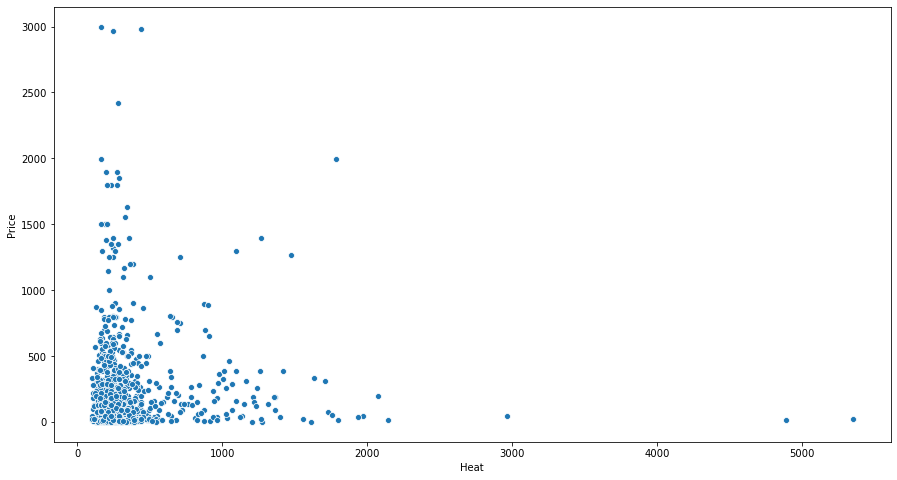

In [109]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(df['Heat'], df['Price'])

(737695.0, 737710.770900448)

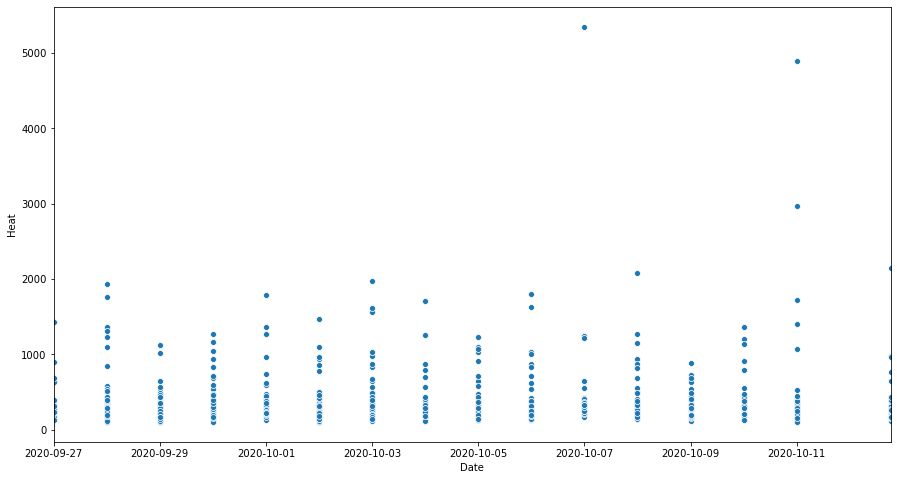

In [108]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(df['Date'], df['Heat'])
ax.set_xlim(df['Date'].min(), df['Date'].max())